# Step 5: 2-D Linear Convection

Up to now, all of our work has been in one spatial dimension. We can learn a lot in just 1D, but let's grow up to flatland: two dimensions.

In the following exercises, we will extend the first four steps to 2D. To extend the 1D finite-difference formulas to partial derivatives in 2D or 3D, just apply the definition: a partial derivative with respect to $x$ is the variation in the $x$ direction *at constant* $y$

In 2D space, a rectangular (uniform) grid is defined by the points with coordinates:

$$
x_i = x_0 + i\Delta x
$$

$$
y_i = y_0 + i\Delta y
$$

Now, define $u_{ij} = u(x_i, y_i)$ and apply the finite-difference formulas on either variable $x,y$ *acting separately* on the $i$ and $j$ indices. All derivatives are based on the 2D Taylor expansion of a mesh point value around $u_{ij}$.

Hence, for a first-order partial derivative in the $x$-direction, a fininte-difference formula is:

$$
\frac{\partial u}{\partial x}\bigg|_{ij} = \frac{u_{i+1j}-u_{ij}}{\Delta x} + \mathcal{O}(\Delta x)
$$

and similarly in the y direction. Thus, we can write backward-difference, forward-difference or central-difference formulas for steps 5 to 12.

## Analysis

The PDE governing 2-D Linear Convection is written as:

$$
\frac{\partial u{\partial t} + c\frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y} = 0
$$

This is the excact same form as with 1-D Linear Convection, except that we now have two spatial dimensions to account for as we step forward in time.

Again, the timestep will be discretized as a forward difference and both spatial steps will be discretized as backward differences.

With 1-D implementations, we used $i$ subscripts to denote movement in space (e.g $u_i^n - u_{i-1}^n). Now that we have two dimensions to account for, we need to add a second subscript, $j$, to account for all the information in the regime.

Here, we'll again use $i$ as the index for our $x$ values, and we'll add the $j$ subscript to track our $y$ values.

With that in mind, our discretization of the PDE should be relatively straightforward.

$$
\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + c\frac{u_{i, j}^n-u_{i-1,j}^n}{\Delta x} + c\frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0
$$

As before, we solve for the only unknown:

$$
u_{i,j}^{n+1} = u_{i,j}^n-c \frac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)-c \frac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)
$$

We will solve this equation with the following initial conditions:

$$
u(x,y) = 
   \begin{cases} 
      2 \text{ for} & 0.5\leq x,y \leq 1 \\
      1 \text{ for} & \text{everywhere else}
   \end{cases}
$$

and boundary conditions:

$$
u = 1 \text{ for}
    \begin{cases}
        x = 0, 2 \\
        y = 0, 2
    \end{cases}
$$

## Analysis

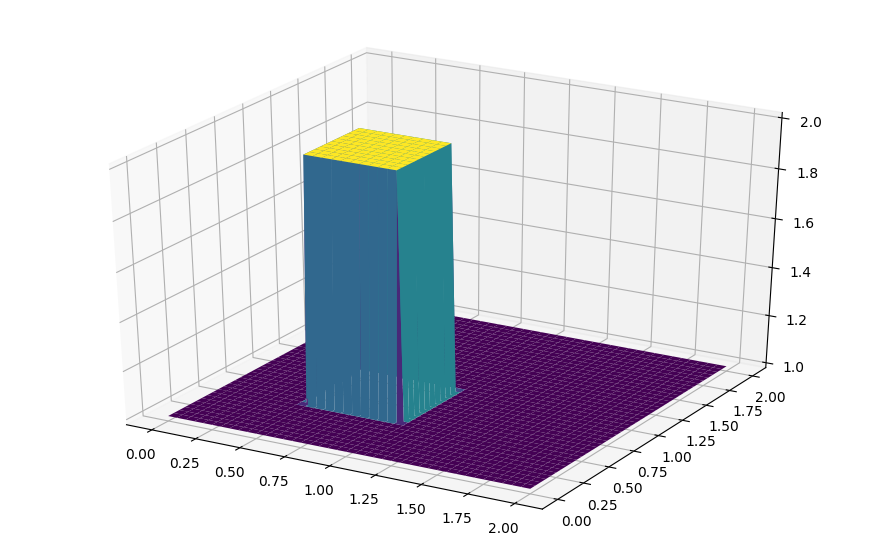

In [2]:
# -------
# Imports
# -------

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import pyplot, cm
%matplotlib inline

# ---------
# Variables
# ---------

nx = 81
ny = 81
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
nt = 100
c = 1
sigma = 0.2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))
un = np.ones((ny, nx))

# ------------------
# Initial Conditions
# ------------------
u[int(0.5 / dy):int(1 / dy + 1), int(0.5 / dx):int(1 / dx + 1)] = 2


# ---------
# Plot IC's
# ---------
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)


### Solving with For-Loops

To evaluate the wave in two dimensions requires the use of several nested for-loops to cover all of the `i`'s and `j`'s. Since Python is not a compiled language there can be noticeable slowdowns in the execution of code with multiple for-loops.

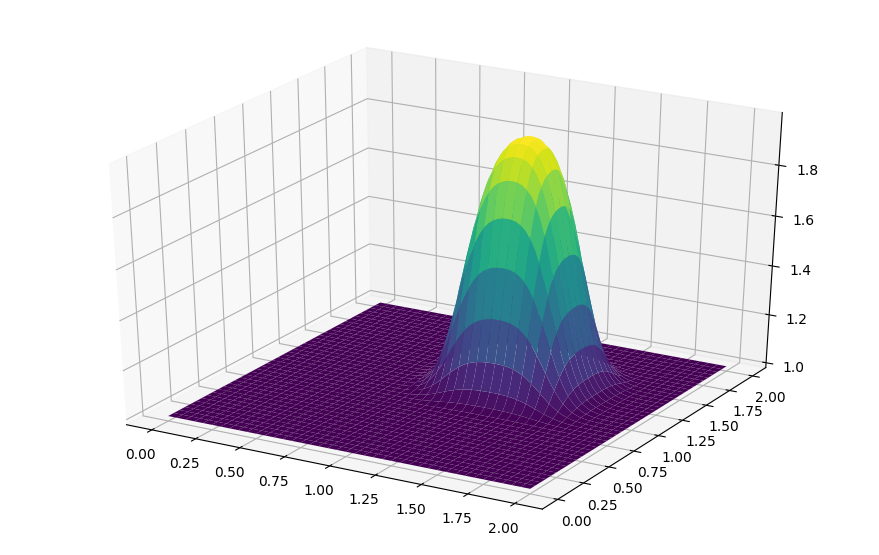

In [8]:
u = np.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1):
    un = np.copy(u)
    row, col = u.shape
    for j in range(1, row):
        for i in range(1, col):
            u[j, i] = (un[j, i] - (c * dt / dx * (un[j, i] - un[j, i - 1])) -
                                  (c * dt / dy * (un[j, i] - un[j - 1, i])))
            u[0, :] = 1
            u[-1, :] = 1
            u[:, 0] = 1
            u[:, -1] = 1
            
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

### Solving with Slicing

Here the same 2D convection code is implemented, but instead of using nested for-loops, the same calculations are evaluated using array operations.

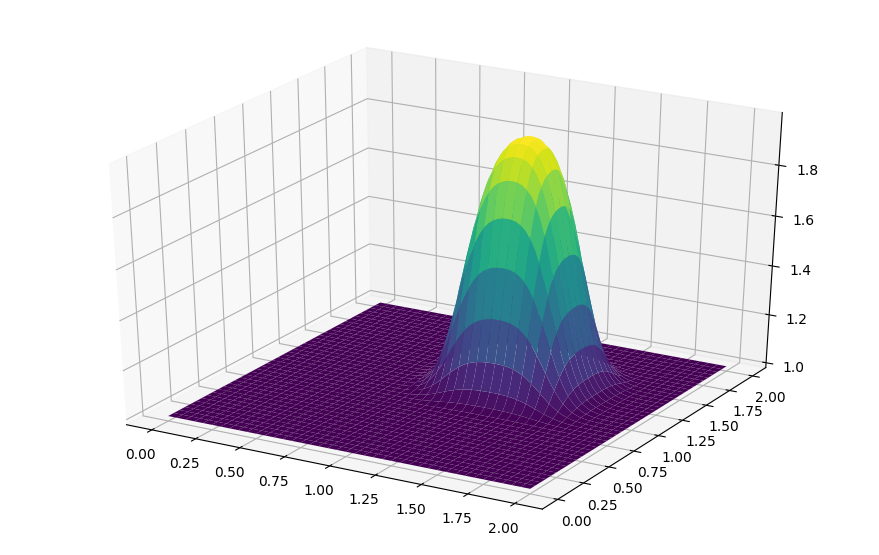

In [10]:
u = np.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1):
    un = u.copy()
    u[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                              (c * dt / dy * (un[1:, 1:] - un[:-1, 1:])))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)